# <center>**Predict the fare amount of future rides using regression analysis**

<center><img src="https://entrackr.com/storage/2017/11/uber-image-2.jpg" style="width: 600px;"/>

### Description:

The project focuses on Uber Inc., the world's largest taxi service provider. The aim is to predict future fare amounts for their transactions. As Uber serves millions of customers every day, effectively managing their data has become crucial for generating innovative business strategies. Accurate fare estimation is now more essential than ever to ensure optimal outcomes and maintain efficiency.

The dataset contains the following fields:
* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

### Objective:
- Analyze and Preprocess the Dataset.
- Develop Regression Models for Fare Prediction.
- Evaluate and Compare Model Performance.

# Strategic Plan of action

**Our objective is to address the problem statement by developing a strategic plan, including the following essential steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling and evaluation
7. Project Outcomes & Conclusion

# 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from geopy.distance import geodesic

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings 
warnings.filterwarnings('ignore')

# 2. Loading Dataset

In [3]:
# Loading the dataset which is in CSV format 

df = pd.read_csv('uber.csv')

# 3. Data Preprocessing and Exploration

In [4]:
# display the first few rows of the dataset

df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# Counting the number of missing (null) values in each column of the DataFrame 'df'

df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
# Providing a concise summary of the DataFrame df, including the number of non-null entries, data types of each column, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
# Removing all rows from the DataFrame df that contain any missing (null) values

df.dropna(axis = 0, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [9]:
# df.drop_duplicates() - there are no duplicate values in the dataset df

In [10]:
# Removing the column 'Unnamed: 0', 'key' as these columns contain unique values and will not provide any insight.   

df.drop(['Unnamed: 0', 'key'], axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


# 4. FEATURE ENGINEERING

## 4.1 Handling Outliers

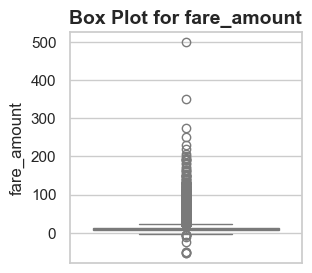

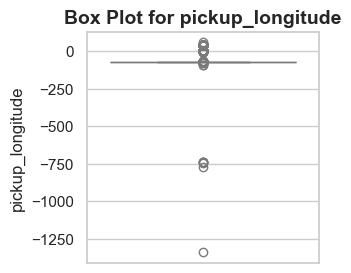

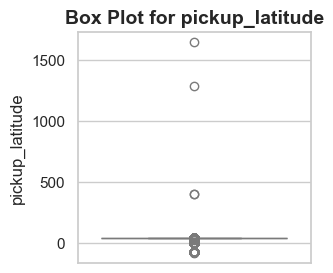

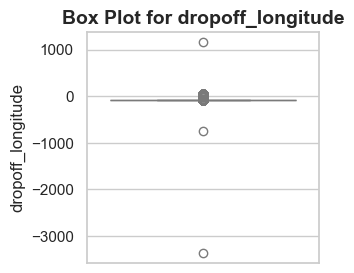

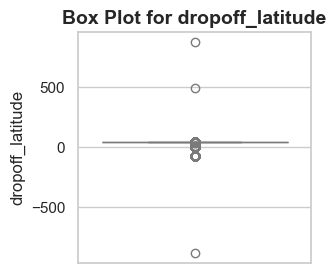

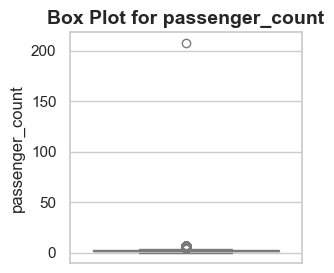

In [12]:
# display box plots for all numeric columns in the DataFrame df to visualize the distribution and detect outliers.
df_numeric = df.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Check for numeric data
        plt.figure(figsize=(3, 3))
        sns.set(style="whitegrid")
        custom_palette = sns.color_palette("pastel")
        sns.boxplot(y=df[col], palette=custom_palette)
        plt.title(f"Box Plot for {col}", fontsize=14, fontweight='bold')
        plt.show()

        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [14]:
''' The code removes outliers from all numeric columns in df by filtering rows based on the 
Interquartile Range (IQR) method, which defines outliers as values beyond 1.5 times the 
IQR above the 75th percentile or below the 25th percentile. '''


for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate the IQR
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to exclude outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

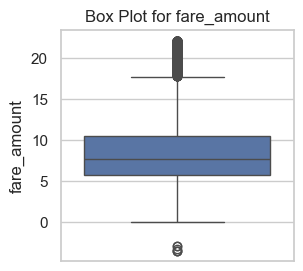

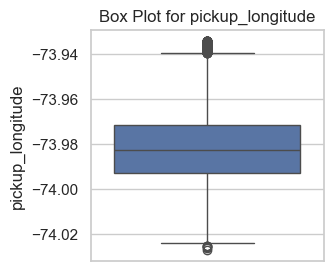

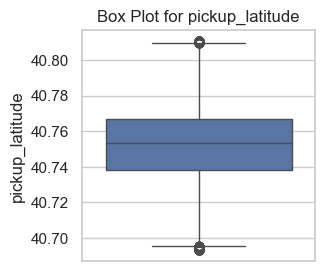

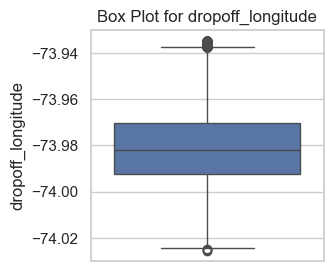

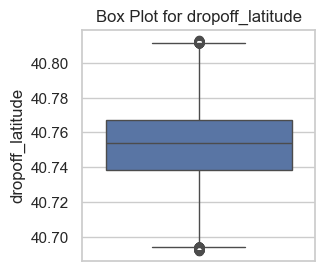

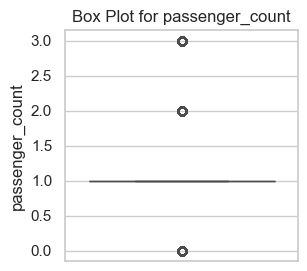

In [15]:
# display box plots for all numeric columns in the DataFrame df to visualize the distribution and detect outliers.

df_numeric = df.select_dtypes(include=[np.number])

for col in df_numeric.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Check for numeric data
        plt.figure(figsize=(3, 3))
        sns.boxplot(df[col])
        plt.title(f"Box Plot for {col}")
        plt.show()

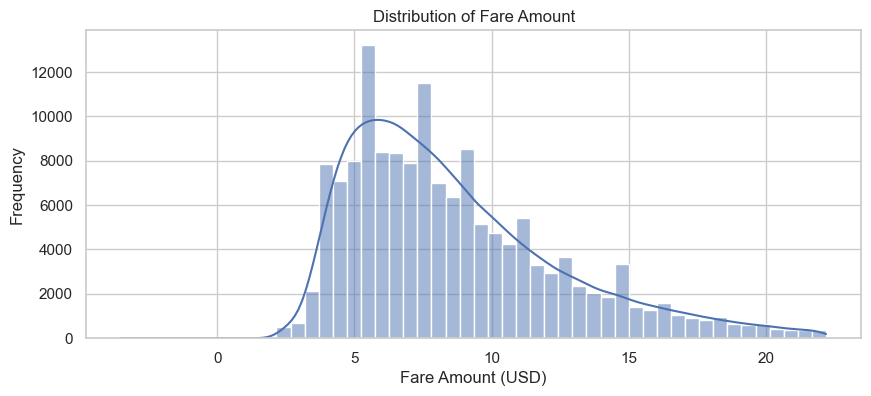

In [16]:
# Plot distribution of fare_amount

plt.figure(figsize=(10,4))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Converting the "pickup_datetime" column in the DataFrame df to a datetime format, then 
# extracting and creating new columns for the year, month, weekday, and hour from the "pickup_datetime" column.
# for better visualization

df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

df["year"] = df["pickup_datetime"].dt.year
df["month"] = df["pickup_datetime"].dt.month
df["weekday"] = df["pickup_datetime"].dt.weekday
df["hour"] = df["pickup_datetime"].dt.hour


In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2


## 4.2 Encoding

In [19]:
#Map the month column
df["Monthly_Quarter"] = df["month"].apply(lambda x: "Q1" if x in [1,2,3] 
                                             else("Q2" if x in [4,5,6]
                                                  else( "Q3" if x in [7,8,9] 
                                                       else("Q4"))))

Lambda Function: The lambda function checks the value of each month and assigns it to a quarter:

- "Q1" for January, February, and March (months 1, 2, 3).
- "Q2" for April, May, and June (months 4, 5, 6).
- "Q3" for July, August, and September (months 7, 8, 9).
- "Q4" for October, November, and December (months 10, 11, 12).

In [20]:
#Map the hour column
df["Hourly_Segments"] = df["hour"].apply(lambda x: "H1" if x in [0,1,2,3] 
                                             else("H2" if x in [4,5,6,7] 
                                                  else("H3" if x in [8,9,10,11]
                                                       else("H4" if x in [12,13,14,15]
                                                            else("H5" if x in [16,17,18,19]
                                                                 else("H6"))))))

filters the DataFrame df to include only the rows where the latitude and longitude values are within their valid ranges:

- Latitude should be between -90 and 90 degrees.
- Longitude should be between -180 and 180 degrees.

In [21]:
#Column leveling
df = df[(df["pickup_latitude"].between(-90,90)) &
        (df["dropoff_latitude"].between(-90,90)) &
        (df["pickup_longitude"].between(-180,180))&
        (df["dropoff_longitude"].between(-180,180))]

In [22]:
'''calculates the distance between pickup and dropoff coordinates for each ride in a dataset, 
then adds these distances as a new column to the DataFrame'''

distances = []

for i in df.index:
    pickup_coords = (df["pickup_latitude"][i], df["pickup_longitude"][i])
    dropoff_coords = (df["dropoff_latitude"][i], df["dropoff_longitude"][i])
    distance = round(geodesic(pickup_coords,dropoff_coords).m,2)
    distances.append(distance)
    
df["distance"] = distances

## 5. Exploratory Data Analysis

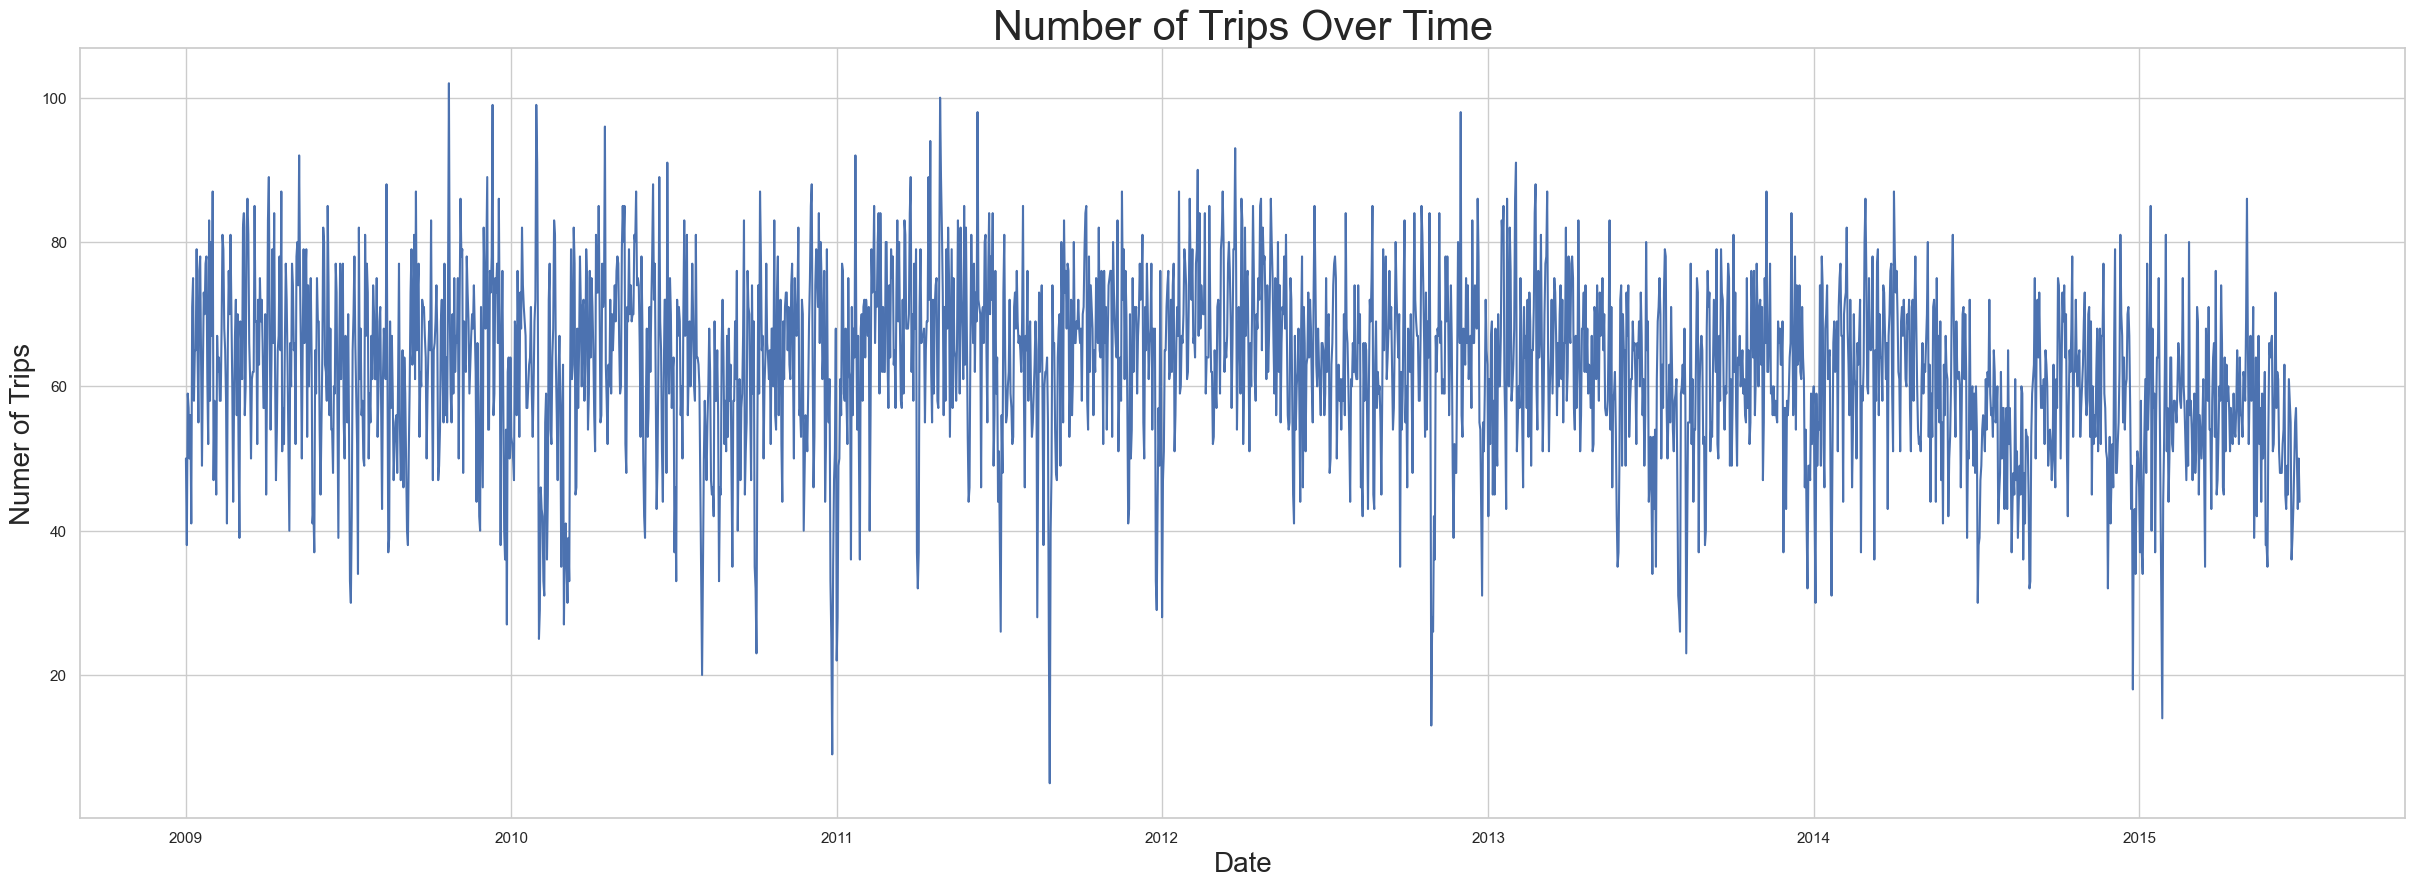

In [23]:
# Plot number of trips over time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['pickup_date'] = df['pickup_datetime'].dt.date
trips_by_date = df.groupby('pickup_date').size()

plt.figure(figsize=(30,10))
trips_by_date.plot()
plt.title('Number of Trips Over Time', size = 30)
plt.xlabel('Date', size = 20)
plt.ylabel('Numer of Trips', size = 20)
plt.show()

- The plot shows a time series of the number of trips over the years 2009 to 2014. The general trend seems to be relatively stable, with some fluctuations throughout the years.

In [24]:
# Looking for the number of unique values for each column in the DataFrame df.

df.nunique()

fare_amount             211
pickup_datetime      146529
pickup_longitude      58363
pickup_latitude       70134
dropoff_longitude     59921
dropoff_latitude      72433
passenger_count           4
year                      7
month                    12
weekday                   7
hour                     24
Monthly_Quarter           4
Hourly_Segments           6
distance             124686
pickup_date            2372
dtype: int64

In [25]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_Quarter,Hourly_Segments,distance,pickup_date
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5,1681.11,2015-05-07
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6,2454.36,2009-07-17
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6,5039.60,2009-08-24
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3,1661.44,2009-06-26
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2,Q1,H1,0.00,2011-02-12


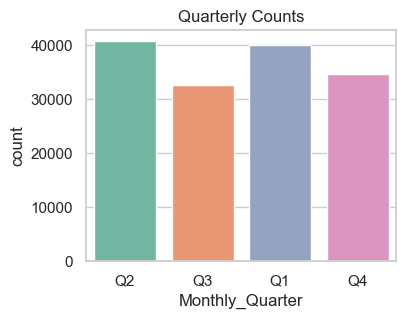

In [26]:
plt.figure(figsize=(4, 3))
sns.countplot(x=df["Monthly_Quarter"], palette="Set2")
plt.title('Quarterly Counts')
plt.show()


- Q2 has the highest count, with a value around 40,000.
- Q3 has the lowest count, with a value around 33,000.
- Q1 and Q4 have intermediate counts, with values around 39,000 and 35,000 respectively.

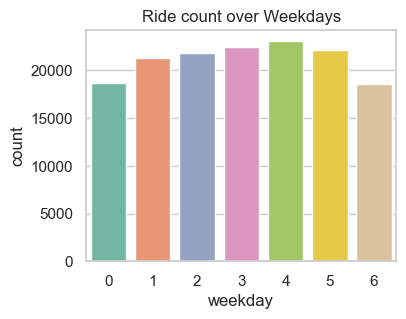

In [27]:
plt.figure(figsize=(4, 3))
sns.countplot(x=df["weekday"], palette="Set2")
plt.title('Ride count over Weekdays')
plt.show()

Inference - 
- On Weekends the ride count is comparatively less as compared to the weekdays. 

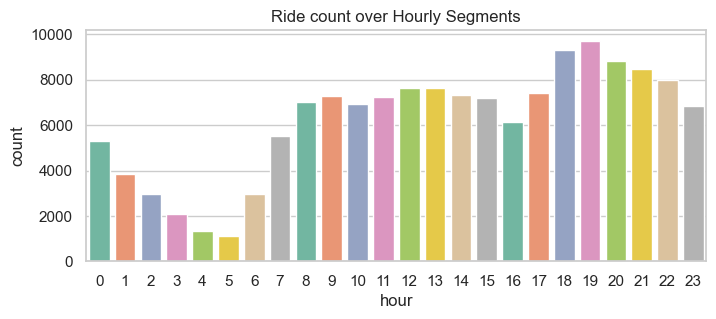

In [28]:
plt.figure(figsize=(8, 3))
sns.countplot(x=df["hour"], palette="Set2")
plt.title('Ride count over Hourly Segments')
plt.show()

Inference - 
- The peak hours for rides are between 6 PM and 10 PM, with the highest number of rides occurring around 8 PM.
- The lowest number of rides occurs in the early morning hours, around 2 AM and 3 AM.
- There is a general increase in the number of rides from the early morning hours until the peak hours, followed by a gradual decrease towards the late night hours.

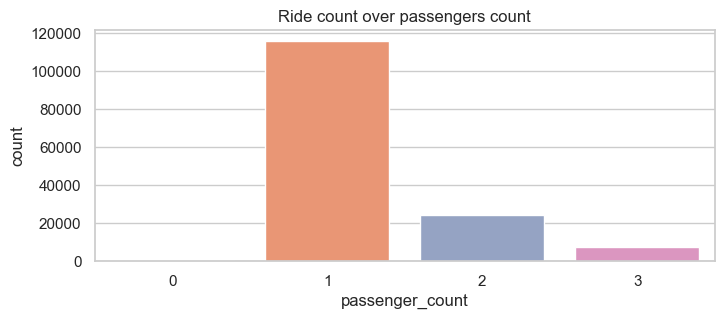

In [29]:
plt.figure(figsize=(8, 3))
sns.countplot(x=df["passenger_count"],palette="Set2")
plt.title('Ride count over passengers count')
plt.show()

Inference - 
- The majority of rides have only one passenger.
- The number of rides decreases significantly as the number of passengers increases.
- There are very few rides with more than two passengers.

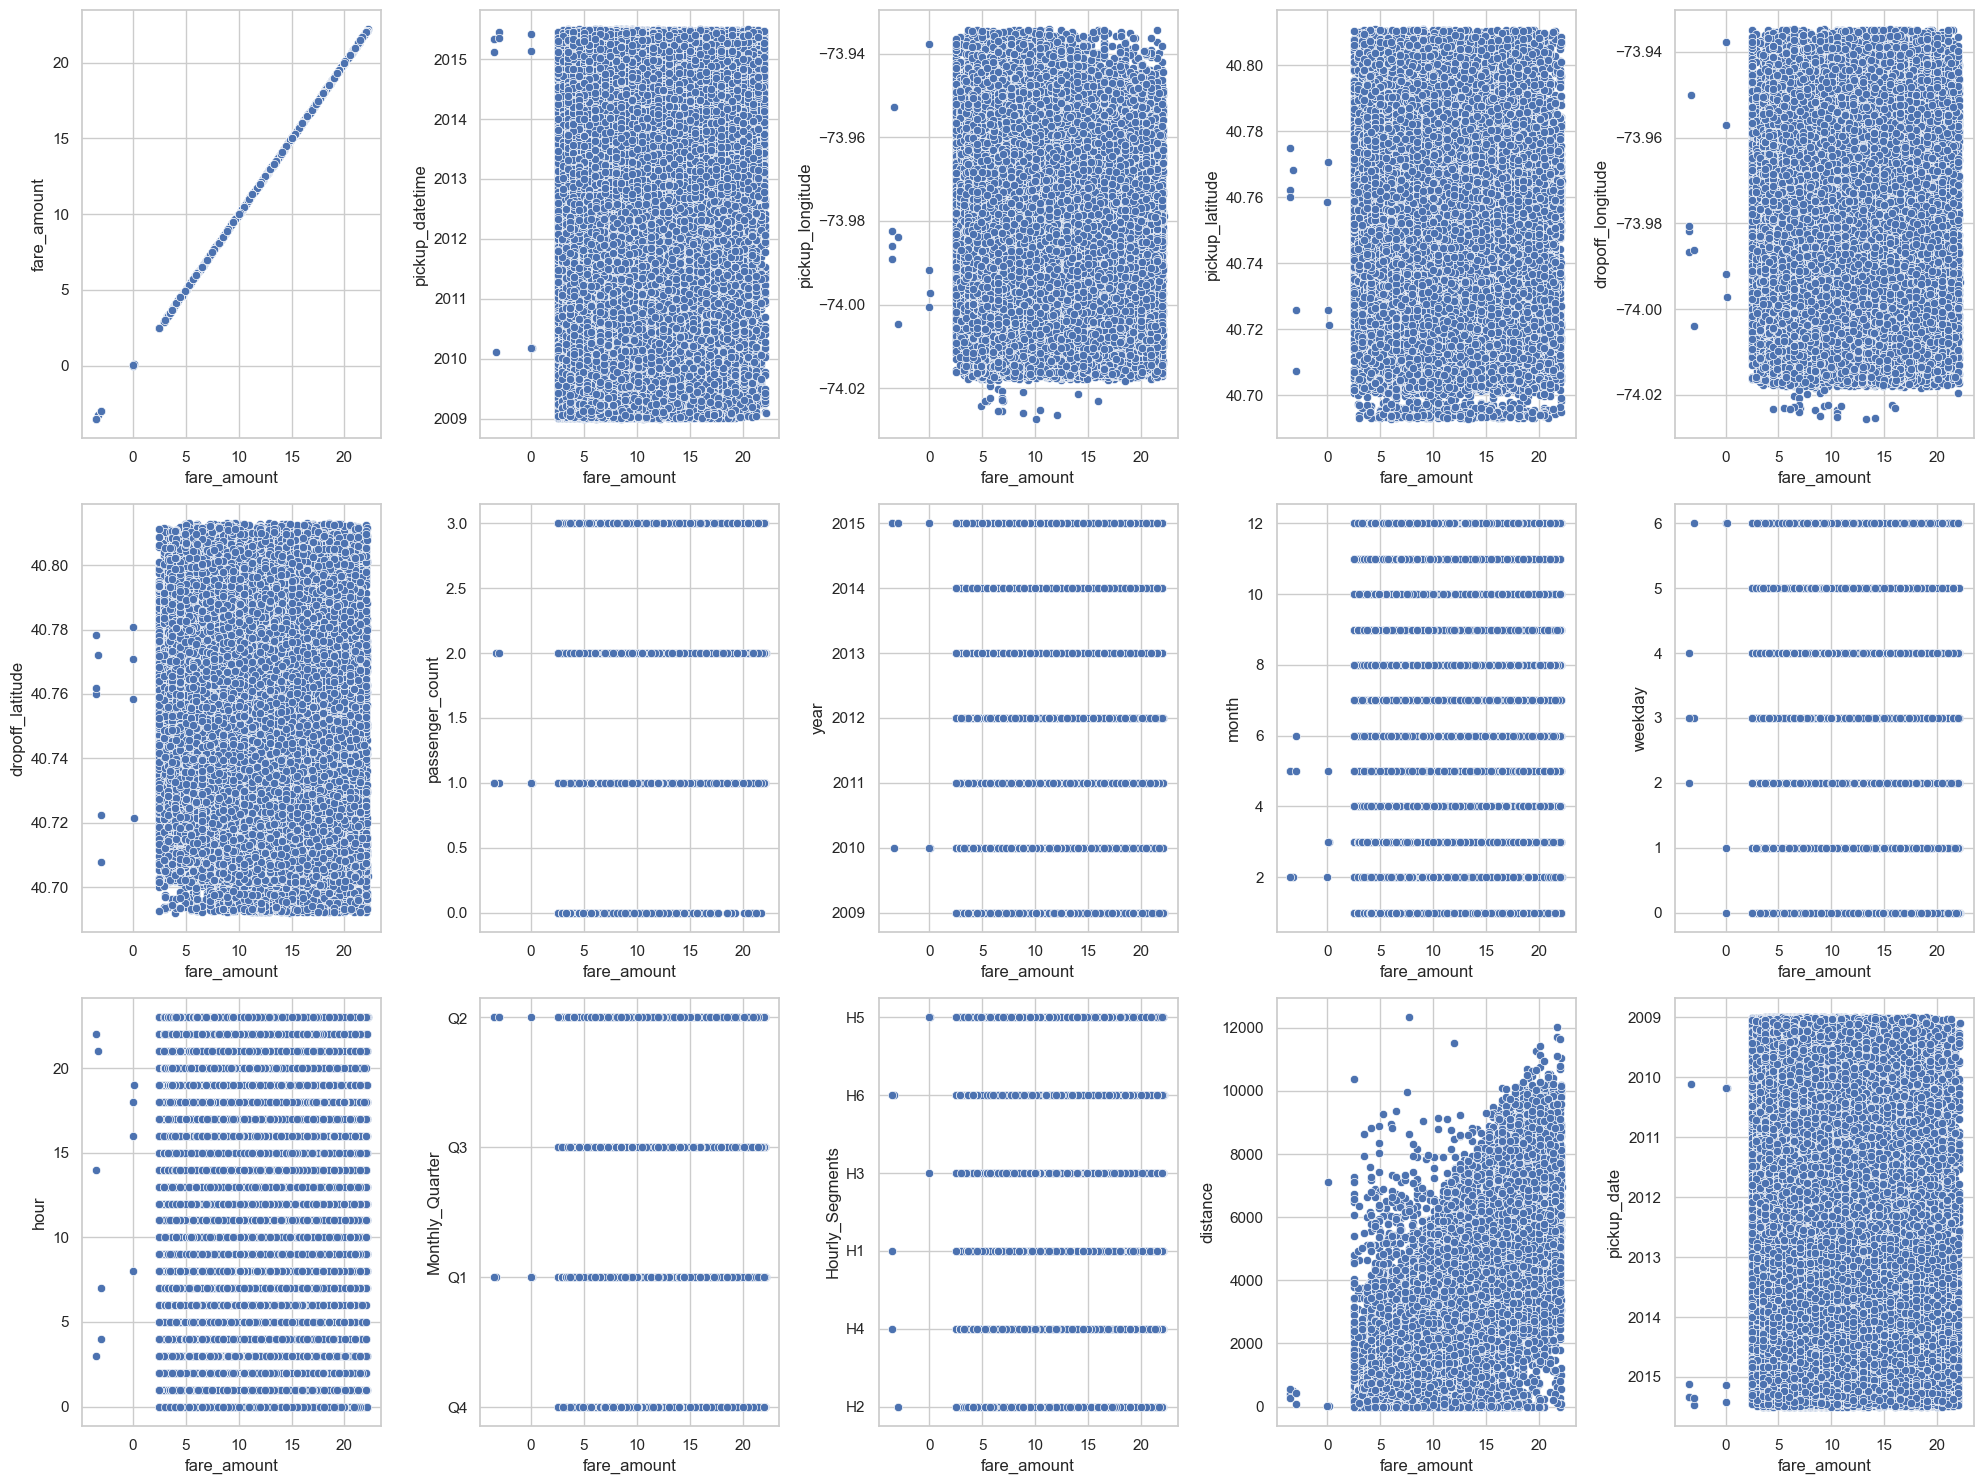

In [30]:
# visual representation of the relationships between fare_amount and various other variables in the dataset

plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 24:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df["fare_amount"], y = df[column])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148074 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        148074 non-null  float64            
 1   pickup_datetime    148074 non-null  datetime64[ns, UTC]
 2   pickup_longitude   148074 non-null  float64            
 3   pickup_latitude    148074 non-null  float64            
 4   dropoff_longitude  148074 non-null  float64            
 5   dropoff_latitude   148074 non-null  float64            
 6   passenger_count    148074 non-null  int64              
 7   year               148074 non-null  int32              
 8   month              148074 non-null  int32              
 9   weekday            148074 non-null  int32              
 10  hour               148074 non-null  int32              
 11  Monthly_Quarter    148074 non-null  object             
 12  Hourly_Segments    148074 non-null 

In [32]:
uber_df = df[["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","distance", "passenger_count", 'Monthly_Quarter', 'hour', 'weekday', 'year']]

In [33]:
uber_df = pd.get_dummies(df,columns = ['Monthly_Quarter', 'hour', 'weekday', 'year', 'passenger_count'],dtype = int, drop_first=True)

In [34]:
uber_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,Hourly_Segments,distance,pickup_date,...,weekday_6,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,5,H5,1681.11,2015-05-07,...,0,0,0,0,0,0,1,1,0,0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,7,H6,2454.36,2009-07-17,...,0,0,0,0,0,0,0,1,0,0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,8,H6,5039.60,2009-08-24,...,0,0,0,0,0,0,0,1,0,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,6,H3,1661.44,2009-06-26,...,0,0,0,0,0,0,0,0,0,1
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,2,H1,0.00,2011-02-12,...,0,0,1,0,0,0,0,1,0,0


In [35]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148074 entries, 0 to 199999
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         148074 non-null  float64            
 1   pickup_datetime     148074 non-null  datetime64[ns, UTC]
 2   pickup_longitude    148074 non-null  float64            
 3   pickup_latitude     148074 non-null  float64            
 4   dropoff_longitude   148074 non-null  float64            
 5   dropoff_latitude    148074 non-null  float64            
 6   month               148074 non-null  int32              
 7   Hourly_Segments     148074 non-null  object             
 8   distance            148074 non-null  float64            
 9   pickup_date         148074 non-null  object             
 10  Monthly_Quarter_Q2  148074 non-null  int32              
 11  Monthly_Quarter_Q3  148074 non-null  int32              
 12  Monthly_Quarter_Q4  1

In [36]:
# Dropping column 'pickup_datetime' as we have already extracted information from it.

uber_df.drop(['pickup_datetime', 'Hourly_Segments'], axis = 1, inplace = True)


In [37]:
uber_df.drop(['pickup_date'], axis = 1, inplace = True)

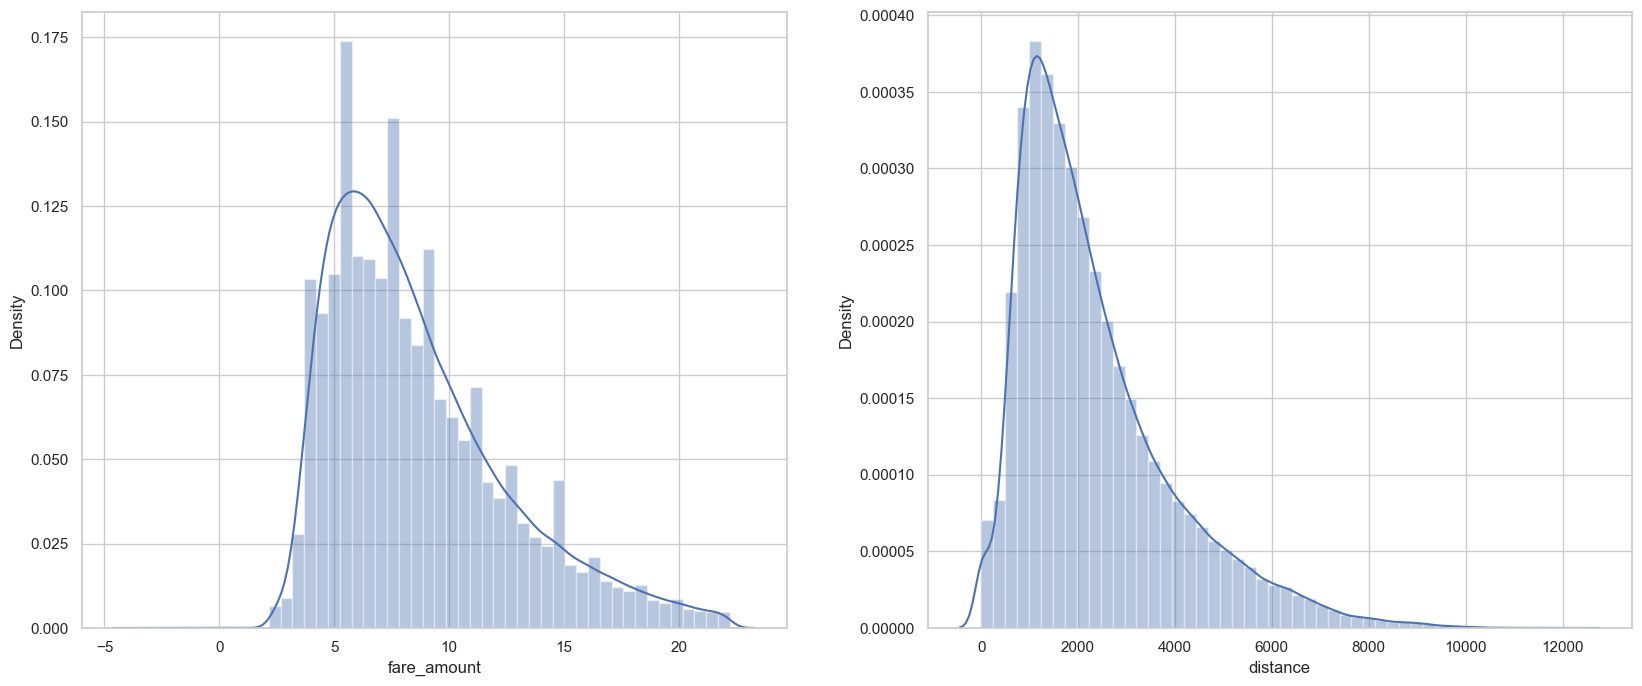

In [38]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(uber_df["fare_amount"])

plt.subplot(1,2,2)
sns.distplot(uber_df["distance"])
plt.show()

Inference - 
- Fare amount and Distance showing normal distribution

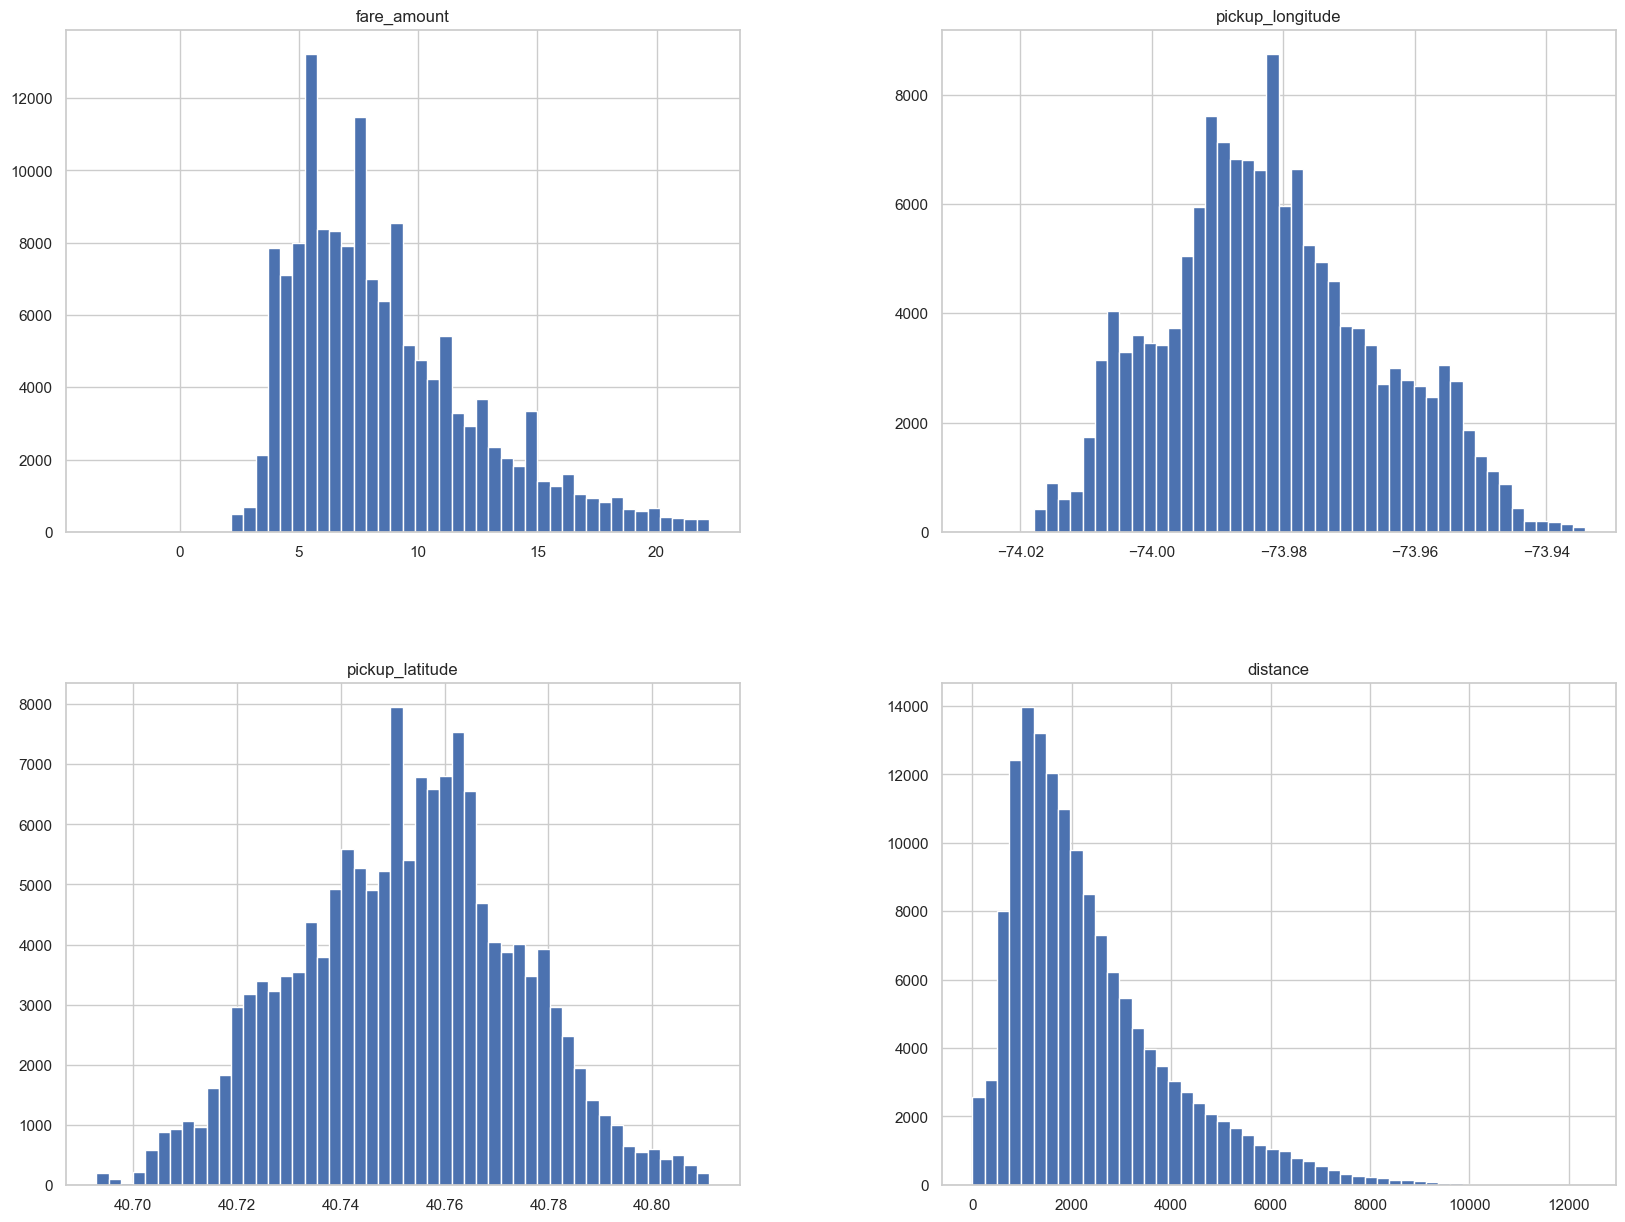

In [39]:
uber_df[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'distance']].hist(bins=50, figsize=(20, 15))
plt.show()

### Correlation of features with Fare amount

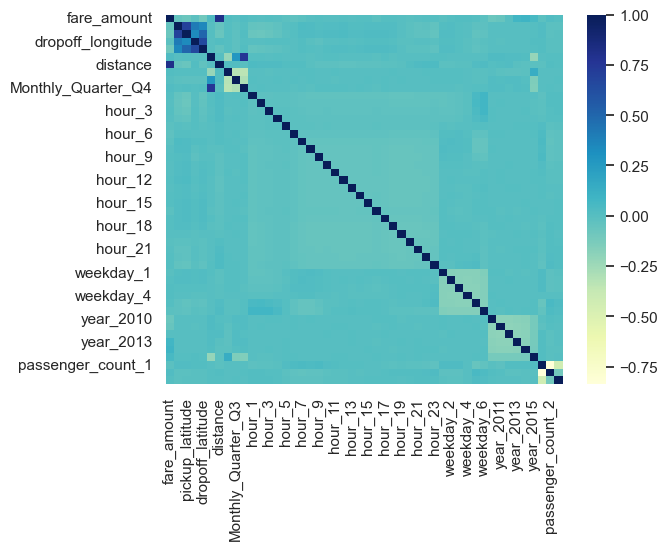

In [40]:
# Looking the correlation between the features

sns.heatmap(uber_df.corr(), cmap="YlGnBu")
plt.show()

# 6.Train - Test Split

In [41]:
''' Spliting the dataset into training and testing sets, with 80% of the data used for training and 20% for testing,
  and prints the shapes of the original and split datasets. '''

X = uber_df.drop(["fare_amount"], axis = 1)
y = uber_df["fare_amount"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(148074, 47) (148074,) (118459, 47) (29615, 47) (118459,) (29615,)


In [42]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,hour_1,...,weekday_6,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3
0,-73.999817,40.738354,-73.999512,40.723217,5,1681.11,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,-73.994355,40.728225,-73.994710,40.750325,7,2454.36,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-74.005043,40.740770,-73.962565,40.772647,8,5039.60,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-73.976124,40.790844,-73.965316,40.803349,6,1661.44,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,-73.969019,40.755910,-73.969019,40.755910,2,0.00,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148074 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pickup_longitude    148074 non-null  float64
 1   pickup_latitude     148074 non-null  float64
 2   dropoff_longitude   148074 non-null  float64
 3   dropoff_latitude    148074 non-null  float64
 4   month               148074 non-null  int32  
 5   distance            148074 non-null  float64
 6   Monthly_Quarter_Q2  148074 non-null  int32  
 7   Monthly_Quarter_Q3  148074 non-null  int32  
 8   Monthly_Quarter_Q4  148074 non-null  int32  
 9   hour_1              148074 non-null  int32  
 10  hour_2              148074 non-null  int32  
 11  hour_3              148074 non-null  int32  
 12  hour_4              148074 non-null  int32  
 13  hour_5              148074 non-null  int32  
 14  hour_6              148074 non-null  int32  
 15  hour_7              148074 non-null  in

## 7. Feature Scaling (Standradization)

In [44]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
std = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_std = std.fit_transform(X_train)

# Transform the testing data using the same scaler fitted on the training data
X_test_std = std.transform(X_test)

In [45]:
X_train_std

array([[-1.17683686, -1.11871696,  0.01887068, ...,  0.52972649,
        -0.44421795, -0.23021071],
       [ 0.18351708, -1.55392799,  0.13813478, ...,  0.52972649,
        -0.44421795, -0.23021071],
       [ 1.89139211,  1.93230503,  0.52290205, ...,  0.52972649,
        -0.44421795, -0.23021071],
       ...,
       [-1.71516976, -2.24322121, -1.13285925, ..., -1.88776666,
         2.25114721, -0.23021071],
       [-1.49768801, -0.58934356, -0.41201125, ..., -1.88776666,
         2.25114721, -0.23021071],
       [ 2.07433715, -1.82638602,  2.28090442, ...,  0.52972649,
        -0.44421795, -0.23021071]])

# MODEL

# Model 1 : Linear Regression

In [46]:
#creating an instance of the LinearRegression class from a machine learning library(sklearn), to perform linear regression modeling.

lr = LinearRegression()

In [47]:
# training the linear regression model (lr) using the standardized training data X_train_std (features) and y_train (target variable)

lr.fit(X_train_std, y_train)

LinearRegression()

### Model 1 Evaluation 

In [49]:
'''accuracy of the linear regression model lr on both the training data (X_train_std, y_train) and 
the test data (X_test_std, y_test). The score method returns the coefficient of determination (R²) 
to evaluate the model's performance.'''

print("Train Accuracy", lr.score(X_train_std,y_train))
print("Test Accuracy", lr.score(X_test_std,y_test))

Train Accuracy 0.7065694151093342
Test Accuracy 0.7106344769032423


Since the Linear Regression model did not perform well on this dataset, it is important to explore other regression models to improve the accuracy of fare predictions. By trying different regressor models, we can identify an approach that better captures the complexities of the data and enhances the overall performance of the prediction model.

# Model 2 : Random Forest Regressor

In [50]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
rf = RandomForestRegressor(max_depth=11, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [51]:
RandomForestRegressor(max_depth=11, random_state=0)


RandomForestRegressor(max_depth=11, random_state=0)

### Model 2 Evaluation

In [52]:
print("Train Accuracy", rf.score(X_train,y_train))
print("Test Accuracy", rf.score(X_test,y_test))

Train Accuracy 0.9900316636942278
Test Accuracy 0.9473084711151801


# Model 3 : XGBoost

In [55]:
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE

# Instantiate the XGBoost Regressor model
# The objective is set to 'reg:linear' for regression tasks
# max_depth defines the maximum depth of the trees (set to 6)
# max_leaf_nodes sets the maximum number of leaf nodes per tree (set to 2)
# n_estimators defines the number of boosting rounds (set to 165)
# seed ensures reproducibility of the results (set to 123)

xgb_r = xg.XGBRegressor(objective ='reg:linear', max_depth = 6,
                        max_leaf_nodes = 2,
                        n_estimators = 165, seed = 123) 


# Fit the model on the training data
# X_train represents the training features, and y_train represents the target variable

xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaf_nodes=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=165,
             n_jobs=None, num_parallel_tree=None, ...)

In [56]:
# Using the trained XGBoost regressor model to make predictions on the test data
# X_test represents the test features, and y_pred stores the predicted values

y_pred = xgb_r.predict(X_test)

In [57]:
print(y_pred)

[-35.651592   -61.621086    36.388824     6.3249397  -12.694076
  -3.0274062   59.47407    -18.183739    11.017796    81.4349
   3.84164    -20.389973   -38.96638      0.94764614 -41.223186
 -42.9405      53.885746   -13.113141    57.687923   -21.904516  ]


### Model 3 Evaluation 

In [58]:
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  8.616447


In [59]:
print("Train Accuracy",xgb_r.score(X_train,y_train))
print("Test Accuracy", xgb_r.score(X_test,y_test))

Train Accuracy 0.9999999991572491
Test Accuracy 0.9629371637511809


### Inference - 

- **Data Overview**: The dataset likely includes features like trip distance, time, and geographic information. Exploratory Data   Analysis (EDA) reveals patterns that help in understanding the variables influencing fare prices.

- **Feature Importance**: Variables such as distance and time of day may have a significant impact on fare prediction.

- **Model Testing**: Different models, including Linear Regression, XGBoost, and Random Forest, were evaluated to identify the best-performing algorithm for predicting Uber fares.
- **Model Performance**: The Random Forest model stood out as the best performer with the highest accuracy and lowest error rate (likely measured using RMSE and R-squared).
- **Evaluation Metrics**: The model's performance was evaluated using common metrics like Root Mean Squared Error (RMSE) and R-squared, confirming the Random Forest model's superior predictive capability.

### Suggestions - 

- **Dynamic Pricing**: Adjust fares based on real-time demand.
- **Driver Incentives**: Reward drivers for peak times and high-demand areas.
- **Service Improvements**: Optimize routes, personalize services, and expand to untapped markets.

### Suggestions on Dataset: 

- **Traffic Data**: Including real-time traffic conditions or historical traffic patterns could provide insights into trip duration and help adjust fare predictions accordingly.
- **Weather Conditions**: Weather plays a significant role in travel time and demand. Features like temperature, precipitation, and weather conditions (e.g., rain, snow) could improve the model's ability to predict fares accurately.
- **Holiday and Event Data**: Fares often increase during holidays, major events, or public gatherings. Incorporating a feature that accounts for special events or holidays could enhance the model's performance.
- **Time of Day and Day of Week**: While time of day may already be included, a more granular approach could be beneficial. For instance, identifying peak hours or busy days (e.g., weekends) could refine predictions.
- **Driver Availability**: Including data on the number of available drivers in a given area could help predict fare fluctuations, particularly during periods of high demand or low driver availability.
- **Passenger Feedback and Ratings**: Features such as passenger ratings or feedback might correlate with fare adjustments, especially if drivers adjust routes or services based on passenger preferences.
- **Geospatial Features**: Adding more detailed geospatial information, such as the type of neighborhood or proximity to key landmarks, could provide better context for fare estimation.
- **Historical Fare Data**: Incorporating previous fare data for similar trips could help the model learn from past patterns and adjust predictions more accurately.